Dataset: https://www.kaggle.com/luisfredgs/imdb-ptbr

In [1]:
import nltk
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package rslp to /home/murilo/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/murilo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/murilo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from wordcloud import WordCloud
from collections import Counter

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv('data/imdb-reviews-pt-br.csv')

df.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
df.isna().sum()

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

In [7]:
df = df[['text_pt', 'sentiment']].dropna()
df.shape

(49459, 2)

In [8]:
df.head(5)

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


In [9]:
df.describe()

,text_pt,sentiment
count,49459,49459
unique,49045,2
top,Amei todays mostrar !!! Foi uma variedade e nã...,neg
freq,5,24765


In [10]:
df.isna().sum()

text_pt      0
sentiment    0
dtype: int64

In [11]:
df['text_length'] = df['text_pt'].apply(len)

In [12]:
df

,text_pt,sentiment,text_length
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,978
1,Este é um exemplo do motivo pelo qual a maiori...,neg,1373
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,1185
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,1848
4,Filmes de fotos de latão não é uma palavra apr...,neg,1531
...,...,...,...
49454,"Como a média de votos era muito baixa, e o fat...",pos,604
49455,O enredo teve algumas reviravoltas infelizes e...,pos,356
49456,Estou espantado com a forma como este filme e ...,pos,2458
49457,A Christmas Together realmente veio antes do m...,pos,1027


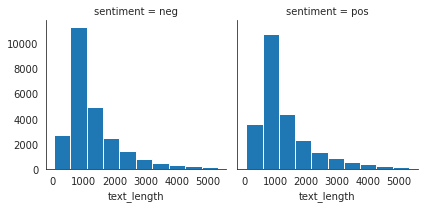

In [13]:
g = sns.FacetGrid(df,col='sentiment')
g.map(plt.hist,'text_length')

<AxesSubplot:xlabel='sentiment', ylabel='text_length'>

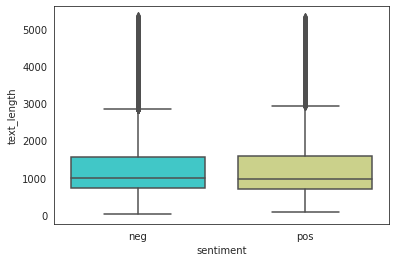

In [14]:
sns.boxplot(x='sentiment',y='text_length',data=df,palette='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

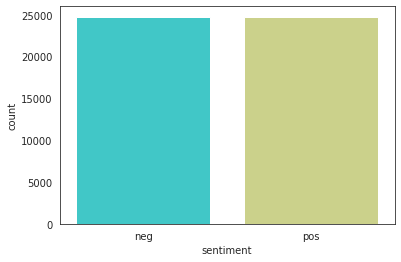

In [15]:
sns.countplot(x='sentiment',data=df,palette='rainbow')

In [16]:
label = df.groupby('sentiment').mean()
label

,text_length
sentiment,
neg,1275.163658
pos,1288.553414


In [19]:
def text_process(mess):
    
    stemmer = nltk.stem.RSLPStemmer()
    
    # Retira pontuações
    text = [char for char in mess if char not in string.punctuation]

    # Junta-os para formar strings
    text = ''.join(text)

    # Remove as stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('portuguese')]

    # Junta-os para formar strings
    text = ' '.join(text)
    
#     t = []
#     for word in text.split():
#         t.append(stemmer.stem(word))

#     text = ' '.join(t)
    
    return text

In [20]:
df['text'] = df['text_pt'].apply(text_process)

In [21]:
df.head(5)

,text_pt,sentiment,text_length,text
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,978,vez Sr Costner arrumou filme tempo necessário ...
1,Este é um exemplo do motivo pelo qual a maiori...,neg,1373,exemplo motivo maioria filmes ação mesmos Gené...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,1185,Primeiro tudo odeio raps imbecis poderiam agir...
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,1848,Beatles puderam escrever músicas todos gostass...
4,Filmes de fotos de latão não é uma palavra apr...,neg,1531,Filmes fotos latão palavra apropriada verdade ...


In [22]:
def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [23]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [25]:
df_positivo = df[(df.sentiment=='pos')]
tokens = df_positivo.text.map(my_tokenizer).sum()

In [26]:
counter = Counter(tokens)
counter.most_common(20)

[('filme', 71686),
 ('filmes', 15844),
 ('ser', 15503),
 ('sobre', 14673),
 ('história', 13313),
 ('realmente', 11126),
 ('bem', 10997),
 ('tão', 10766),
 ('todos', 10670),
 ('anos', 10407),
 ('pode', 9958),
 ('apenas', 9361),
 ('ver', 8980),
 ('bom', 8631),
 ('melhor', 8425),
 ('ainda', 8166),
 ('pessoas', 8006),
 ('ter', 7971),
 ('vida', 7964),
 ('vez', 7843)]

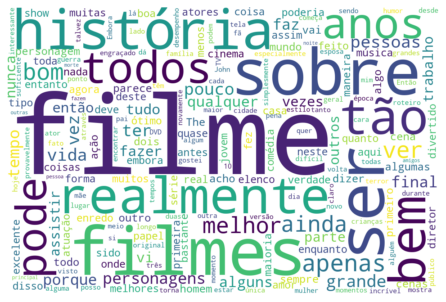

In [27]:
# create wordcloud
wordcloud(counter)

In [28]:
df_negativo = df[(df.sentiment=='neg')]
tokens = df_negativo.text.map(my_tokenizer).sum()

In [29]:
counter = Counter(tokens)
counter.most_common(20)

[('filme', 80542),
 ('ser', 18490),
 ('filmes', 16205),
 ('tão', 14155),
 ('sobre', 14121),
 ('realmente', 12997),
 ('apenas', 12767),
 ('ter', 12204),
 ('história', 10207),
 ('pode', 10038),
 ('todos', 9029),
 ('ver', 9022),
 ('ruim', 9019),
 ('porque', 8865),
 ('pessoas', 8835),
 ('tempo', 8737),
 ('fazer', 8602),
 ('qualquer', 8466),
 ('melhor', 8154),
 ('anos', 7910)]

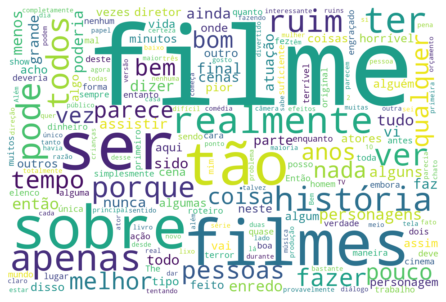

In [30]:
# create wordcloud
wordcloud(counter)

In [31]:
def text_process(mess):
    
    stemmer = nltk.stem.RSLPStemmer()
    
    # Retira pontuações
    text = [char for char in mess if char not in string.punctuation]

    # Junta-os para formar strings
    text = ''.join(text)

    # Remove as stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('portuguese')]

    # Junta-os para formar strings
    text = ' '.join(text)
    
    t = []
    for word in text.split():
        t.append(stemmer.stem(word))

    text = ' '.join(t)
    
    return text

In [32]:
df['text'] = df['text_pt'].apply(text_process)

In [33]:
df = df[(df.sentiment=='pos') | (df.sentiment=='neg')]
df

,text_pt,sentiment,text_length,text
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,978,vez sr costn arrum film temp necess além terr ...
1,Este é um exemplo do motivo pelo qual a maiori...,neg,1373,exempl motiv maior film açã mesm genér chat na...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,1185,prim tud odei rap imbecil pod agir arm pressio...
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,1848,beatl pud escrev músic tod gost emb walt hill ...
4,Filmes de fotos de latão não é uma palavra apr...,neg,1531,film fot lat palavr apropri verdad tant ous qu...
...,...,...,...,...
49454,"Como a média de votos era muito baixa, e o fat...",pos,604,méd vot baix fat funcion loc ach tud bem muit ...
49455,O enredo teve algumas reviravoltas infelizes e...,pos,356,enred algum reviravolt infeliz inacredit entan...
49456,Estou espantado com a forma como este filme e ...,pos,2458,espant form film maior outr méd 5 estrel men f...
49457,A Christmas Together realmente veio antes do m...,pos,1027,christm togeth real vei ant temp cri john denv...


In [34]:
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=100)

In [35]:
cv = CountVectorizer()

cv_fit = cv.fit(X_train)
X_train = cv_fit.transform(X_train)
X_test = cv_fit.transform(X_test)

In [36]:
print(len(cv_fit.vocabulary_))
print('\n')
print(X_test.toarray())

83910


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [1]:
# print(cv_fit.vocabulary_)

In [38]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [39]:
predictions = nb.predict(X_test)

In [40]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[4343  640]
 [ 803 4106]]


              precision    recall  f1-score   support

         neg       0.84      0.87      0.86      4983
         pos       0.87      0.84      0.85      4909

    accuracy                           0.85      9892
   macro avg       0.85      0.85      0.85      9892
weighted avg       0.85      0.85      0.85      9892



In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8541245450869389

In [42]:
text = text_process('odiei o filme')
X = cv_fit.transform([text])

In [43]:
print(X.count_nonzero)

<bound method _data_matrix.count_nonzero of <1x83910 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>>


In [44]:
predictions = nb.predict(X)

In [45]:
predictions

array(['neg'], dtype='<U3')

In [47]:
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=100)

In [48]:
cv = CountVectorizer()

cv_fit = cv.fit(X_train)
X_train = cv_fit.transform(X_train)
X_test = cv_fit.transform(X_test)

In [49]:
tf = TfidfTransformer()

tf_fit = tf.fit(X_train)
X_train = tf_fit.transform(X_train)
X_test = tf_fit.transform(X_test)

In [50]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [51]:
predictions = nb.predict(X_test)

In [52]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[4360  623]
 [ 775 4134]]
              precision    recall  f1-score   support

         neg       0.85      0.87      0.86      4983
         pos       0.87      0.84      0.86      4909

    accuracy                           0.86      9892
   macro avg       0.86      0.86      0.86      9892
weighted avg       0.86      0.86      0.86      9892



In [53]:
accuracy_score(y_test, predictions)

0.8586736756975334